<a href="https://colab.research.google.com/github/Rahuldeshmukh142/AlmaBetter-Projects/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
## Importing nessessory Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

import datetime as dt

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
## Mounted google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
## Importing Dataset
df=pd.read_csv("/content/gdrive/My Drive/Unsupervised ML Customer Segmentation/Online Retail.xlsx.csv")

In [4]:
## Reading Dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


## **Exploration**

In [6]:
## Shape of the data
df.shape

(541909, 8)

Our dataset contains 541909 observations of 08 raw features.

In [7]:
 # looking for discreptive statistics of data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
## Information about the the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


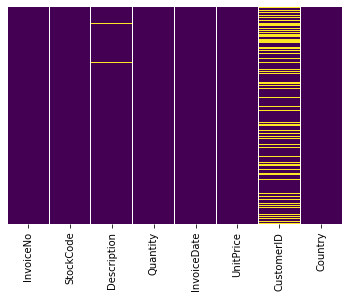

In [9]:
## Checking null values 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
## Dropping NA values
df=df.dropna()

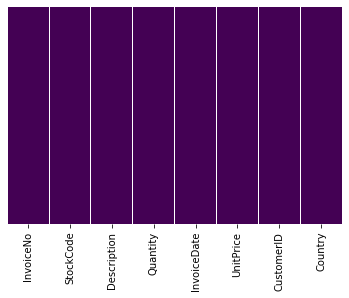

In [13]:
## Checking null values 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

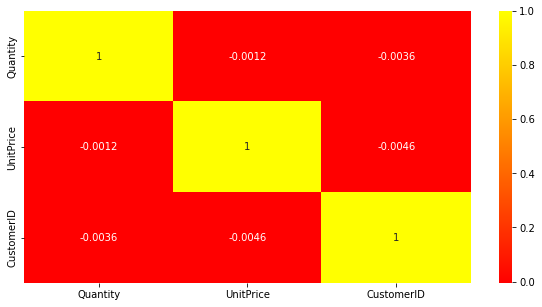

In [14]:
fig, ax = plt.subplots(figsize=(10,5))# checking the correlation so that we can decide which many variables are important.
sns.heatmap(df.corr(), annot= True, cmap= "autumn",ax=ax)

In [15]:
# Handle cancellation as new feature
df["Cancelled"] = df["InvoiceNo"].str.startswith("C")
df["Cancelled"] = df["Cancelled"].fillna(False)

In [16]:
# Hnadle incorrect Description
df = df[df["Description"].str.startswith("?") == False]
df = df[df["Description"].str.isupper() == True]
df = df[df["Description"].str.contains("LOST") == False]

In [17]:
# Convert Invoice Number to integer as we already consider Cancellation as new feature
df['InvoiceNo'].replace(to_replace="\D+", value=r"", regex=True, inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('int')

In [18]:
# remove shiping invoices
df = df[(df["StockCode"] != "DOT") & (df["StockCode"] != "POST")]
df.drop("StockCode", inplace=True, axis=1)

In [19]:
# remove outliers by qty
qte_false = [74215, 3114, 80995]  # fond during exploration but not done here (found with a boxplot on qty or price)
for qte in qte_false:
    df = df[(df["Cancelled"] == False) & (df["Quantity"] !=qte)]

In [20]:
# Now we can only keep the order without cancellation
df = df[df["Cancelled"] == False]
df.drop("Cancelled", axis=1, inplace=True)

In [21]:
# We can create the feature Price
df["Price"] = df["UnitPrice"] * df["Quantity"]

# convert date to proper datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

Now the dataset starts to be clean, we can now convert our Countries to a value. To do so, we will rank them based on their impact of the revenue.


## Handling Customer Country
As mentionned above, here we can think about encoding Country to their rank based on their impact on the Revenue. Let's look at values for number of invoices per country and the revenue per country.



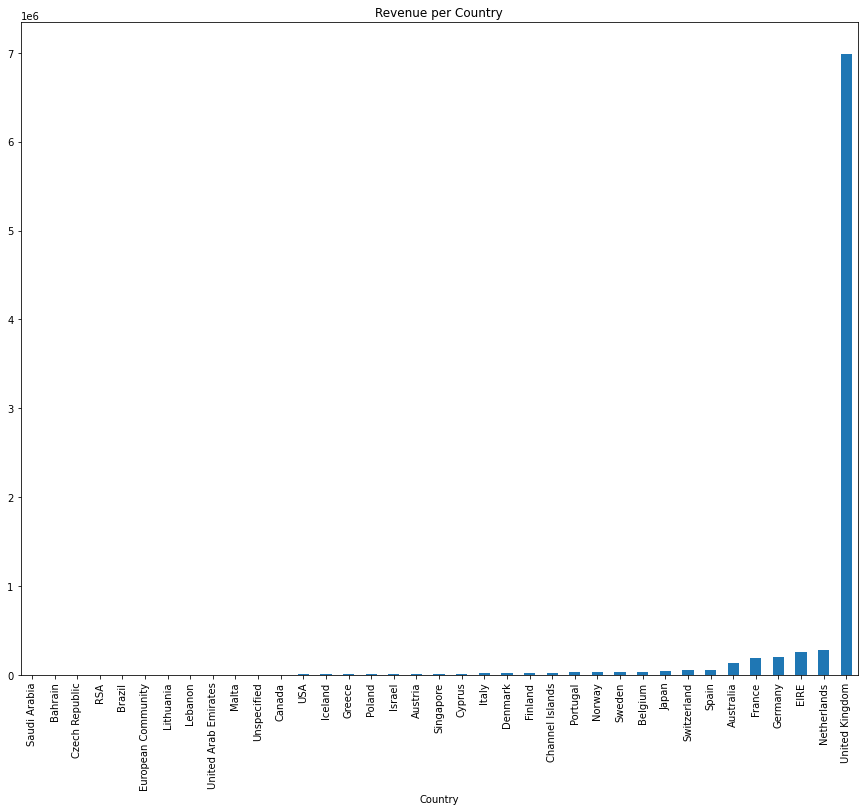

In [22]:
## Visualizing Pevenue per country
revenue_per_countries = df.groupby(["Country"])["Price"].sum().sort_values()
revenue_per_countries.plot(kind='bar', figsize=(15,12))
plt.title("Revenue per Country")
plt.show()

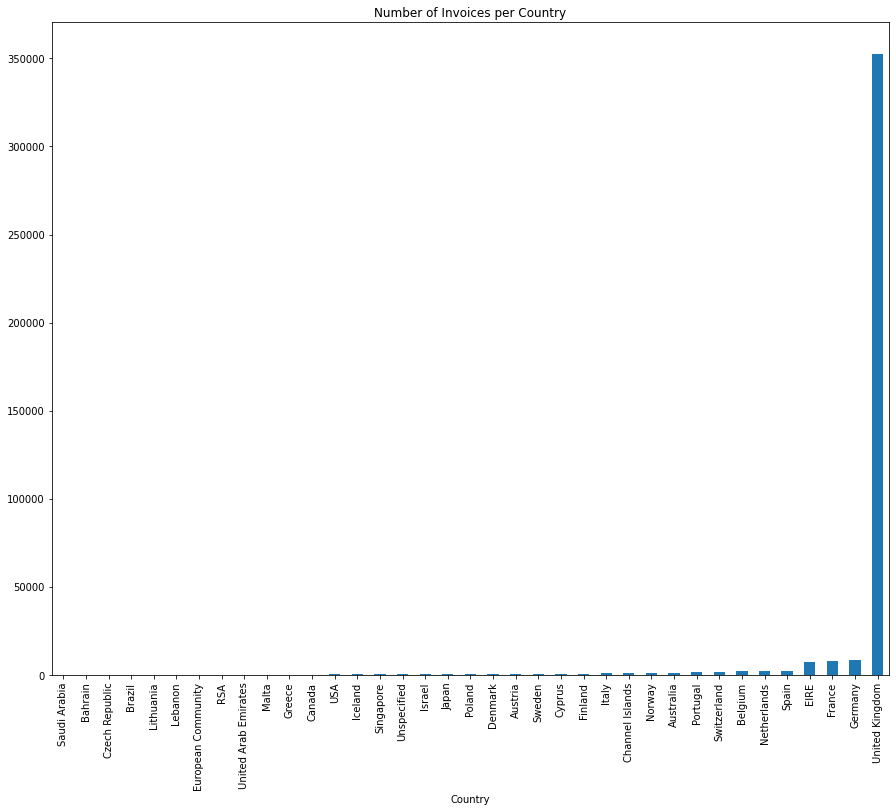

In [23]:
## Visualizing NUmber of invoices per country
No_invoice_per_country = df.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.plot(kind='bar', figsize=(15,12))
plt.title("Number of Invoices per Country")
plt.show()

We can see that for example Netherland bring more money with less Invoices. That means we may order country by their average purchase price instead of only the price or the quantity. Now the strategy changed.

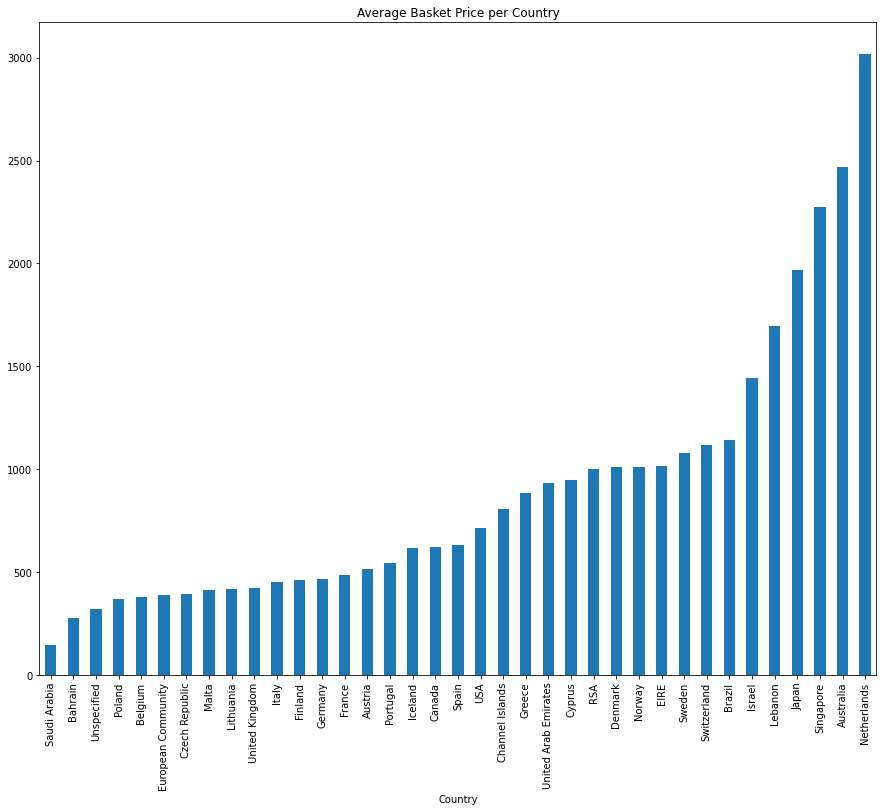

In [24]:
## Visualizing Avarage Basket price per country
best_buyer = df.groupby(["Country", "InvoiceNo"])["Price"].sum().reset_index().groupby(["Country"])["Price"].mean().sort_values()
best_buyer.plot(kind='bar', figsize=(15,12))
plt.title("Average Basket Price per Country")
plt.show()

That's it, we now have a cleaner scale as the country won't be biaised by the huge number of order comming from UK. It's also a good indicator on where the Shop should expand his market. If I were him, I'd think about Netherlands ! Now let's encode the country.

In [25]:
encoder_countries = best_buyer.rank().to_dict()
decoder_countries = {i: j for i, j in encoder_countries.items()}

df["Country"]  = df["Country"].apply(lambda x:encoder_countries[x])

We have only 1 feature remaining to pre-process before to go on, it's the articles descriptions. To do so, we will first generate a Term-Frequency Matrix and a Term-Frequency Invert Document-Frequency Matrix with all uniques articles. Then we will prepare this matrix to be able to run a clustering on it. The clustering will be tried with multiple size of clusters. The best parameter will be used an analysis of the content will be done in order to check that it's relevant.

In [26]:
X = df["Description"].unique()

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
X = df["Description"].unique()

X = df["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = CountVectorizer().build_analyzer()
CV = CountVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter)
TF_matrix = CV.fit_transform(X)
print("TF_matrix :", TF_matrix.shape, "of", TF_matrix.dtype)

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_matrix : (3853, 1686) of int64
TF_IDF_matrix : (3853, 1686) of float64


So there is no word which appears in more than a third of our dataset. We can now think about which matrix should we use ? Both matrices are very sparse so before to do the clustering, we should ensure that we will be able to compute proper distances. The thing to do in such case, it's to go throught the TruncatedSVD. I used 100 output features but we may increase it. 100 is the default value to perform what is called Latent Semantic Analysis. Both matrices will be full of float64 numbers. After Normalization to have a norm of 1 for each row, we can do a clustering.

In [30]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import MinMaxScaler

In [31]:
from sklearn.preprocessing import Normalizer

In [32]:
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_embedded = svd.fit_transform(TF_matrix)
TF_embedded = normalizer.fit_transform(TF_embedded)
print("TF_embedded :", TF_embedded.shape, "of", TF_embedded.dtype)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_embedded : (3853, 100) of float64
TF_IDF_embedded : (3853, 100) of float64


For the clustering, we can check the Silhouette Score. If we do that with multiple number of cluster we will see that there is a flat after 60 clusters. To dertermine the best choice after that, we can also take a look at the number of articles in both clusters. If all articles are in 1 cluters, that lean the clustering is very poor. We can also take a look at the distribution of article per clusters.

In [33]:
score_tf = []
score_tfidf = []
mean_tf = []
std_tf = []
mean_tfidf = []
std_tfidf = []

x = list(range(5, 105, 5))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_embedded)
    clusters = kmeans.predict(TF_embedded)
    silhouette_avg = silhouette_score(TF_embedded, clusters)
#     print("N clusters =", n_clusters, "Silhouette Score :", silhouette_avg)
    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tf.append(silhouette_avg)
    mean_tf.append(rep.mean())
    std_tf.append(rep.std())

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)
#     print("N clusters =", n_clusters, "Silhouette Score :", silhouette_avg)
    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)
    mean_tfidf.append(rep.mean())
    std_tfidf.append(rep.std())

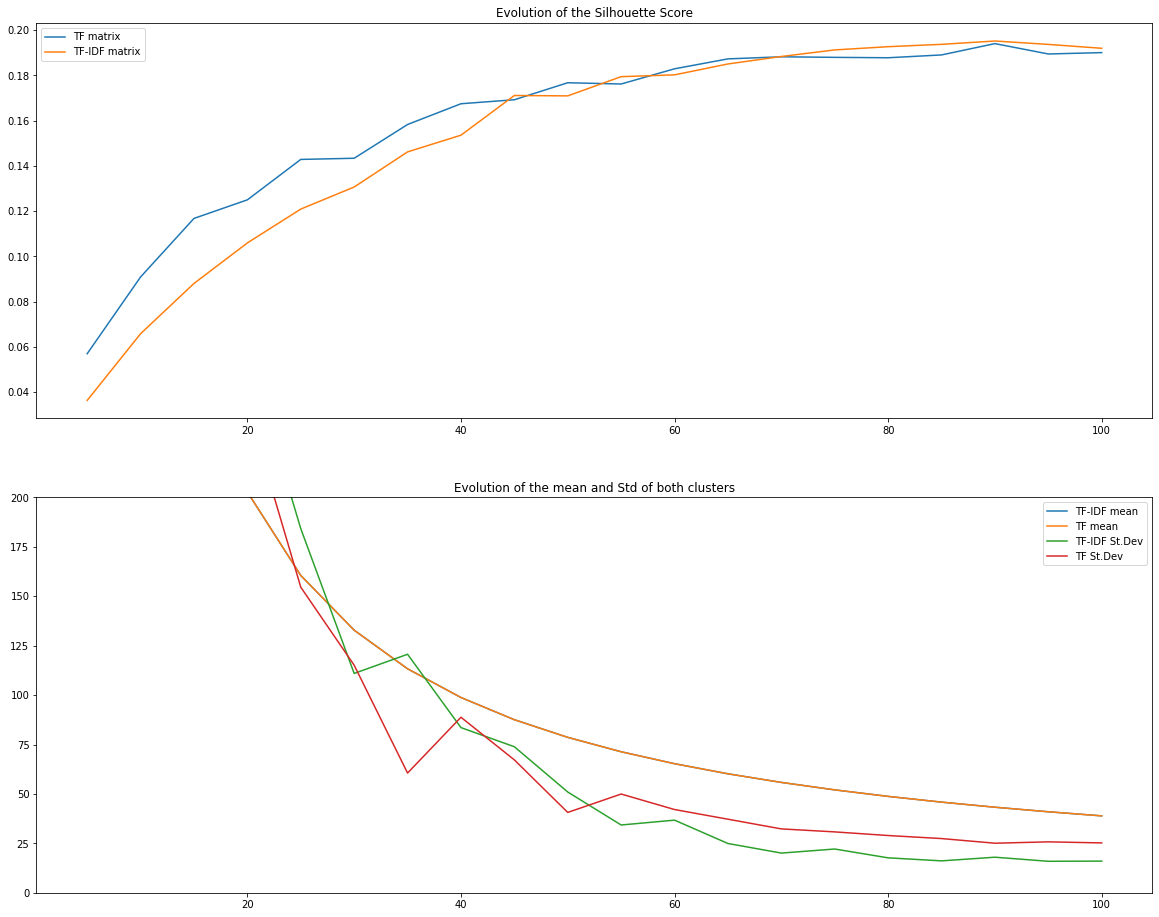

In [34]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tf, label="TF matrix")
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, mean_tfidf, label="TF-IDF mean")
plt.plot(x, mean_tf, label="TF mean")
plt.plot(x, std_tfidf, label="TF-IDF St.Dev")
plt.plot(x, std_tf, label="TF St.Dev")
plt.ylim(0, 200)
plt.title("Evolution of the mean and Std of both clusters")
plt.legend()

plt.show()

We can see that 100 cluster is the value where the silhouette score is the highest and and Std Dev minimum. In term of choice, we should select the matrix TF-IDF instead of TF as the score is highest after 60 clusters. Let's do a final clustering with 100 cluster. and we can explore the content of some clusters by using cloudword.

In [35]:
n_clusters = 100

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=42)
kmeans.fit(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)

In [36]:
from wordcloud import WordCloud 
import random

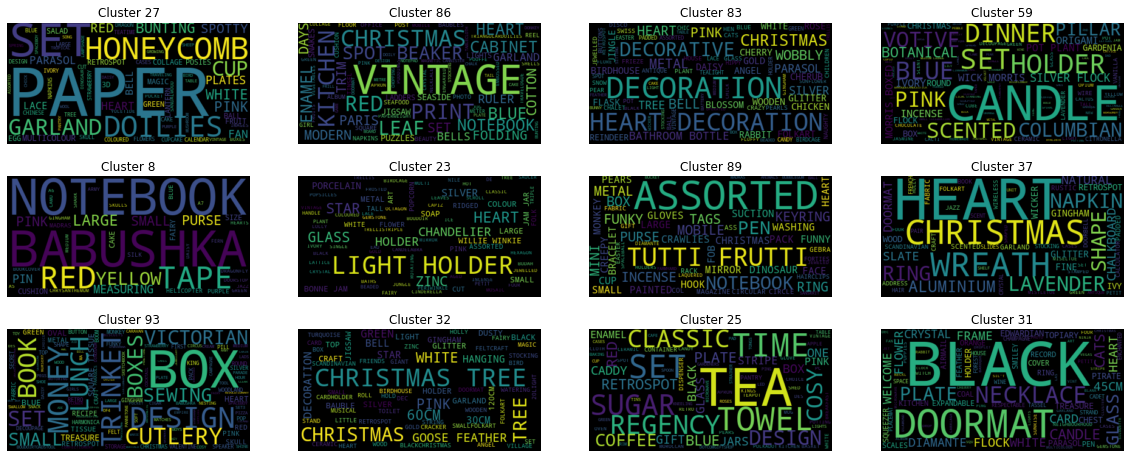

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()
plt.show()

We can see that the content is different for both clusters and the balance is quite good from the calculation. We can consider it as a good clustering. We can now map the article to the cluster.

In [38]:
from sklearn.manifold import TSNE

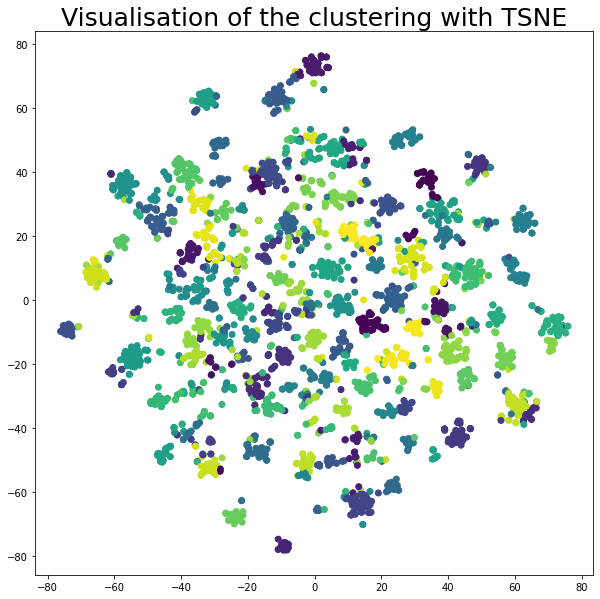

In [39]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualisation of the clustering with TSNE", fontsize="25")
plt.show()

#Modelization

Intermediate dataset grouped by invoices

Now we have everything to start the preparation of the final dataset. First we will One-Hot-Encode the price spent on every cluster par invoices. In parralleel, we will also perform a groupby on the dataset initial before to merge them.

In [40]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(X, clusters)}

We can also take a look at the position of clusters in space with TSNE. A good alternative and faster is UMAP

In [41]:
cluster = df['Description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Article_cluster").mul(df["Price"], 0)
df2 = pd.concat([df['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum()

In [42]:
custom_aggregation = {}
custom_aggregation["Price"] = "sum"
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"

df_grouped = df.groupby("InvoiceNo").agg(custom_aggregation)

In [43]:
# let create recency for every Invoice
now = df_grouped["InvoiceDate"].max()  # as the dataset is not done in the present
df_grouped["Recency"] = now - df_grouped["InvoiceDate"]
df_grouped["Recency"] = pd.to_timedelta(df_grouped["Recency"]).astype("timedelta64[D]") # conversion to day from now

# add features required for the next groupby
df_grouped["nb_visit"] = 1
df_grouped["total_spent"] = 1

In [44]:
##Final Dataset per customer

df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
df2_grouped_final = df2_grouped_final.fillna(0)

In [45]:
custom_aggregation = {}
custom_aggregation["Price"] = ["mean", "sum"]
custom_aggregation["nb_visit"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Recency"] = ["min", "max"]

df_grouped_final = df_grouped.groupby("CustomerID").agg(custom_aggregation)

In [46]:
df_grouped_final["Freq"] = (df_grouped_final["Recency"]["max"]  - df_grouped_final["Recency"]["min"] ) / df_grouped_final["nb_visit"]["sum"]
df_grouped_final.columns = ["avg_price", "sum_price", "nb_visit", "country", "quantity", "min_recency", "max_recency", "freq"]

In [47]:
df_grouped_final.head()

,avg_price,sum_price,nb_visit,country,quantity,min_recency,max_recency,freq
CustomerID,,,,,,,,
12347.0,615.714286,4310.00,7,17.0,2458,1.0,366.0,52.142857
12348.0,359.310000,1437.24,4,12.0,2332,74.0,357.0,70.750000
12349.0,1457.550000,1457.55,1,11.0,630,18.0,18.0,0.000000
12350.0,294.400000,294.40,1,27.0,196,309.0,309.0,0.000000
12352.0,197.962857,1385.74,7,27.0,526,35.0,296.0,37.285714


## Clustering
Now we have our 2 datasets. we won't merge them as there is not the same scaling. The scaling has to be done upfront. One dataset has raw values and the other one is scaled by row to have the percentage on every cluster. Now we will do a clustering and check the number of clusters required to explain all kind of customer (nevertheless, in order to be able to explain every group, the number of cluster will be limited to 10).

In [48]:
X1 = df_grouped_final.values 
X2 = df2_grouped_final.values

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X_final_minmax_scale = np.concatenate((X1, X2), axis=1)

In [49]:
x = list(range(2, 10))
y_std = []
y_minmax = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")
    
    kmeans.fit(X_final_minmax_scale)
    clusters = kmeans.predict(X_final_minmax_scale)
    silhouette_avg = silhouette_score(X_final_minmax_scale, clusters)
    y_minmax.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with MinMax Scaling")

n_clusters = 2
The average silhouette_score is : 0.28239033624668414 with Std Scaling
The average silhouette_score is : 0.24536419230833306 with MinMax Scaling
n_clusters = 3
The average silhouette_score is : 0.2881707571504483 with Std Scaling
The average silhouette_score is : 0.29151104809865375 with MinMax Scaling
n_clusters = 4
The average silhouette_score is : 0.349651245687875 with Std Scaling
The average silhouette_score is : 0.2063322196405817 with MinMax Scaling
n_clusters = 5
The average silhouette_score is : 0.3730499204985604 with Std Scaling
The average silhouette_score is : 0.1787558939322723 with MinMax Scaling
n_clusters = 6
The average silhouette_score is : 0.38207368427424776 with Std Scaling
The average silhouette_score is : 0.14843820952301798 with MinMax Scaling
n_clusters = 7
The average silhouette_score is : 0.3626909105053355 with Std Scaling
The average silhouette_score is : 0.1515317686146616 with MinMax Scaling
n_clusters = 8
The average silhouette_score is :

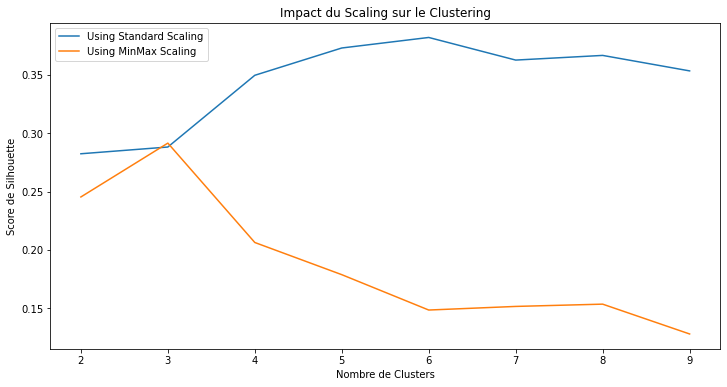

In [50]:
plt.figure(figsize=(12,6))

plt.plot(x, y_std, label="Using Standard Scaling")
plt.plot(x, y_minmax, label="Using MinMax Scaling")

plt.legend()
plt.xlabel("Nombre de Clusters")
plt.ylabel("Score de Silhouette")
plt.title("Impact du Scaling sur le Clustering")
plt.xticks(x)

plt.show()

At cluster = 2, the score is clearly high beacuse the cluster group nearly all customers, we should focus only on higher sizes. On it we can see that the Standard Scaling is clearly better. Regarding the score, the best number of cluster seems to be 6. We can take a look at the histogram just to ensure that there is a balance even if we may have few customer really differents.

In [51]:
kmeans = KMeans(init='k-means++', n_clusters = 6, n_init=30, random_state=42)  # random state just to be able to provide cluster number durint analysis
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

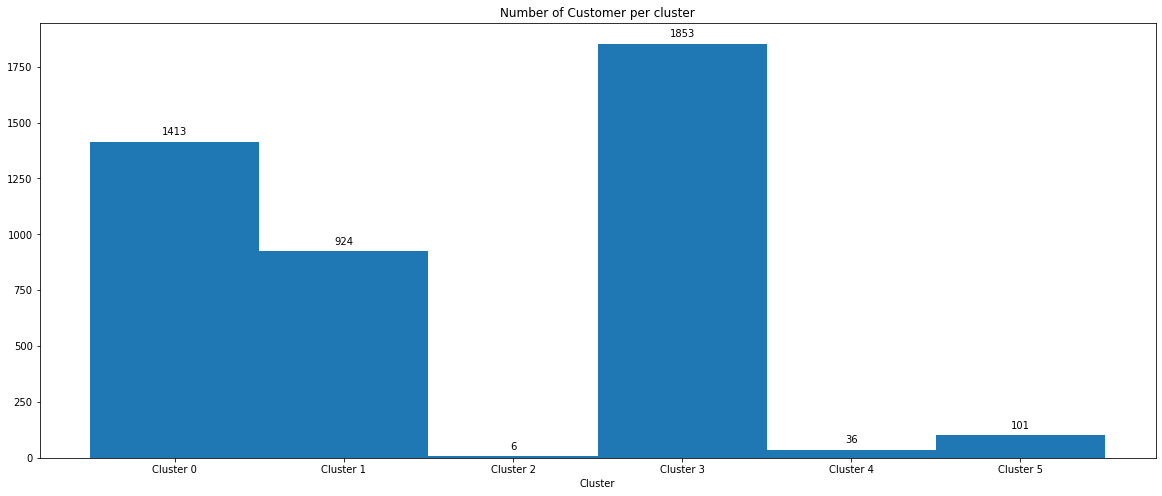

In [52]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=6) # arguments are passed to np.histogram
plt.xlabel("Cluster")
plt.title("Number of Customer per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(6)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.

plt.show()

## Analysis
We will now used raw datas or the dataset of percentage per cluster to explore all types of customers. Let's start with a visualisation with TSNE as we did previously.

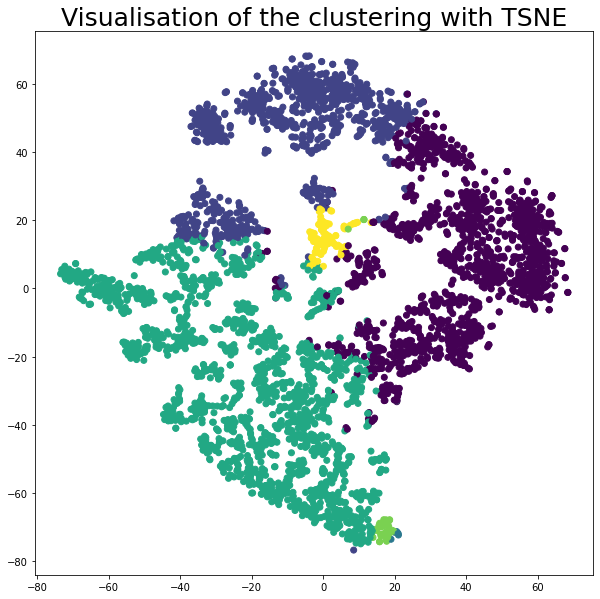

In [53]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualisation of the clustering with TSNE", fontsize="25")
plt.show()

We can also compare both cluster based on the frequency of purchase and the average price.

In [54]:
df_grouped_final["cluster"] = clusters
df_grouped_final.head()

,avg_price,sum_price,nb_visit,country,quantity,min_recency,max_recency,freq,cluster
CustomerID,,,,,,,,,
12347.0,615.714286,4310.00,7,17.0,2458,1.0,366.0,52.142857,3
12348.0,359.310000,1437.24,4,12.0,2332,74.0,357.0,70.750000,3
12349.0,1457.550000,1457.55,1,11.0,630,18.0,18.0,0.000000,0
12350.0,294.400000,294.40,1,27.0,196,309.0,309.0,0.000000,5
12352.0,197.962857,1385.74,7,27.0,526,35.0,296.0,37.285714,5


In [55]:
df_analysis = df_grouped_final.groupby("cluster").mean()
df_analysis.head()

,avg_price,sum_price,nb_visit,country,quantity,min_recency,max_recency,freq
cluster,,,,,,,,
0,355.110748,674.726477,1.951875,10.246285,444.837933,49.561925,76.588818,8.705133
1,295.106692,447.111646,1.556277,10.190476,245.896104,257.932900,277.899351,7.286851
2,3574.186403,185895.701667,75.500000,24.833333,91219.666667,6.666667,361.166667,7.152145
3,358.925642,2347.926266,6.404209,10.212089,1382.881813,41.588235,302.951430,59.326306
4,2128.193650,39226.228889,44.305556,10.611111,24529.111111,23.027778,342.416667,11.144696


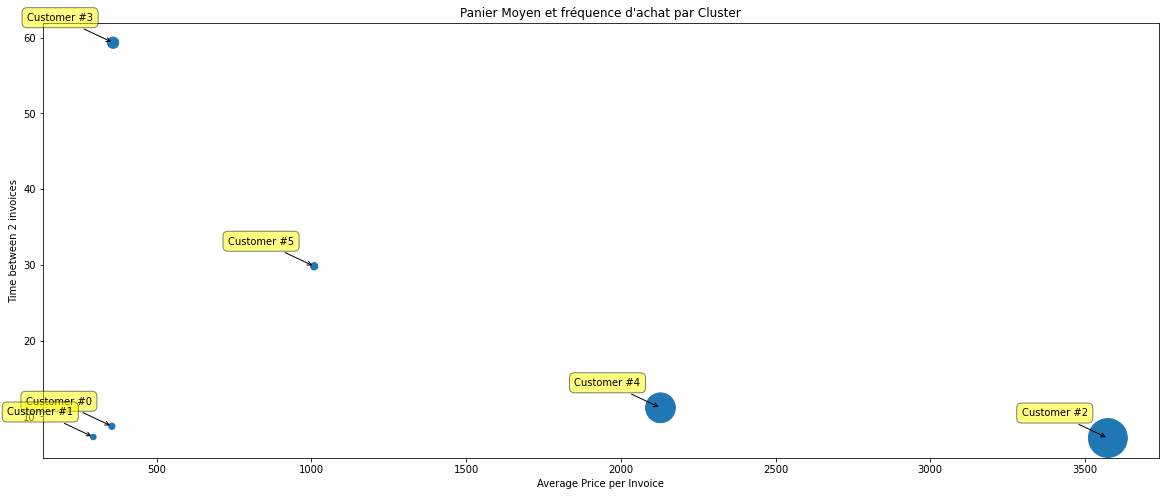

In [56]:
price = df_analysis["avg_price"].values
freq = df_analysis["freq"].values
visit = df_analysis["nb_visit"].values

plt.figure(figsize = (20,8))
plt.scatter(price, freq, s=visit*20)
    
for label, x, y in zip(["Customer #{}".format(x) for x in range(6)], price, freq):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.title("Panier Moyen et fréquence d'achat par Cluster")
plt.xlabel("Average Price per Invoice")
plt.ylabel("Time between 2 invoices")

plt.show()

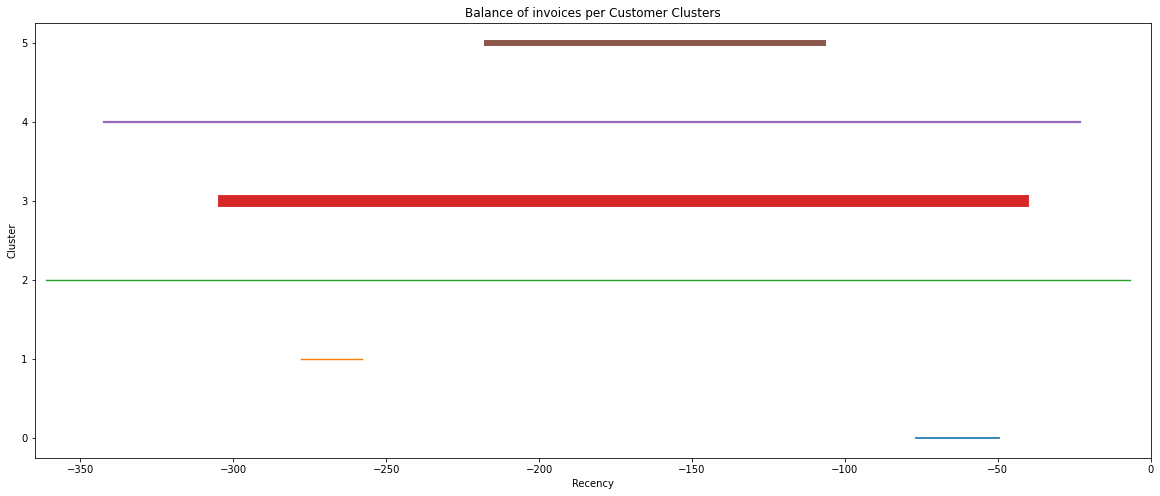

In [57]:
x_max = df_analysis["min_recency"].values
x_min = df_analysis["max_recency"].values
freq = df_analysis["freq"].values

plt.figure(figsize = (20,8))
for i in range(6):
    plt.plot([-x_min[i] , -x_max[i]], [i, i], linewidth=freq[i]/5)

plt.xlim(-365, 0)
plt.title("Balance of invoices per Customer Clusters")
plt.xlabel("Recency")
plt.ylabel("Cluster")
plt.show()

The previous plots highlight the differences between clusters.

The cluster #4 is having a very high mean price (3600 € per basket) and very often (every 5 days). If we take a look at histogramme of number of customer, we can see that this small group of people should be considered as V.I.P. and should be handled like "outliers". In term of history, we can also see that it's old customers and still active so probably happy from our store.

In term of frequency, we can see that there is 2 clusters with also a good frequency but a small basket (#0 and #1). If we take a look at the "history", we can see that it's customer who already purchase few time and we were not able to convert them to frequent customer. Unfortunately, the 2 cluster group more that 2350 customers. They probably join the store for a specific discount.

To finish, if we take a look at the cluster #5 grouping 1850 customers, we can see that they order not very often but in a correct quantity (360€ every 60 days). We should maintain the fidelity of this group as it represent also an important part of the Revenue.

Now let see what every cluster is purchasing

In [58]:
purchase_mean = df2_grouped_final.set_index(clusters).groupby(clusters).mean()
purchase_mean.head()

,Article_cluster_0,Article_cluster_1,Article_cluster_2,Article_cluster_3,Article_cluster_4,Article_cluster_5,Article_cluster_6,Article_cluster_7,Article_cluster_8,Article_cluster_9,...,Article_cluster_90,Article_cluster_91,Article_cluster_92,Article_cluster_93,Article_cluster_94,Article_cluster_95,Article_cluster_96,Article_cluster_97,Article_cluster_98,Article_cluster_99
0,0.008418,0.006728,0.000663,0.005369,0.020672,0.017788,0.012653,0.007226,0.002934,0.004756,...,0.008137,0.006614,0.011699,0.022879,0.018804,0.010993,0.006065,0.011166,0.008414,0.025984
1,0.003224,0.011346,0.000422,0.003236,0.036613,0.021052,0.014515,0.000275,0.003255,0.004441,...,0.005269,0.011836,0.012777,0.024714,0.013143,0.010134,0.001210,0.010188,0.008009,0.040777
2,0.009321,0.007884,0.000075,0.002335,0.027005,0.025906,0.015707,0.024594,0.000746,0.002095,...,0.002772,0.009881,0.019067,0.036749,0.001028,0.002617,0.002175,0.011732,0.009031,0.042763
3,0.006173,0.013188,0.000550,0.003140,0.029932,0.022896,0.008744,0.003695,0.002397,0.003736,...,0.006700,0.008460,0.012358,0.023388,0.011971,0.011013,0.003131,0.009603,0.007113,0.029545
4,0.009173,0.015689,0.000328,0.002661,0.035458,0.027213,0.008153,0.002017,0.001774,0.002212,...,0.002658,0.002027,0.008437,0.039833,0.007862,0.004873,0.002578,0.009129,0.003223,0.038282


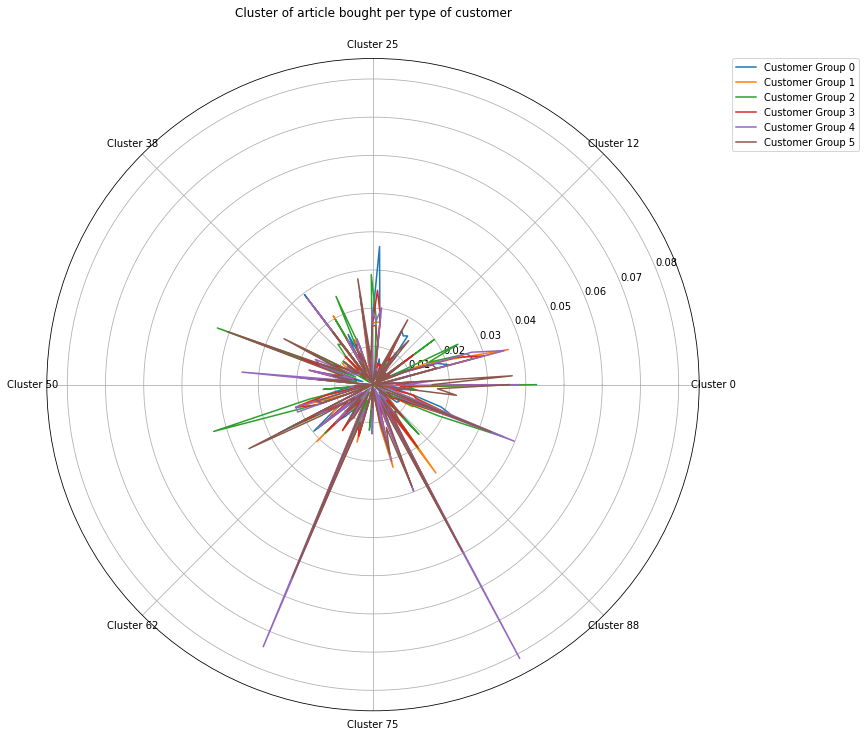

In [59]:
plt.figure(figsize=(15,12))
ax = plt.subplot(111, projection='polar')
theta = 2 * np.pi * np.linspace(0, 1, 100)
matrix = purchase_mean.values

for i in range(6):
    r = matrix[i, :]
    ax.plot(theta, r, label="Customer Group {}".format(i))

ax.set_xticklabels([
    "Cluster 0", "Cluster 12", "Cluster 25", "Cluster 38", 
    "Cluster 50", "Cluster 62", "Cluster 75", "Cluster 88"
])

ax.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Cluster of article bought per type of customer", va='bottom')
plt.show()

We can see taht there is some basic clusters where all customer order items and there is some other nearly empty (for example cluster 76). If we have to orient our company, we could reduce the order of this type of parts and focus on main buckets.

## Building Classification Model
We saw that all classes are quite different. For a balance in production, we can guess that a Tree model should work well. At first, we will try it and based on the result, we may change to another model. There is also 2 additionnal good point for this model, we can build the tree an see visually the outcome. But another advantage, is to be able to use raw data without scaling. The evaluation will be done on Cross Validation as we don't have a lot of customer to also keep a validation dataset (al least for nearly empty clusters). As the smallest cluster has 6 customer, we will use 5 split for the validation and we will track accuracy and the standard deviation between all score. Which means that it's not really repetible.

In [60]:
clusters.shape

(4333,)

In [61]:
classification_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
classification_dataset.head()

,avg_price,sum_price,nb_visit,country,quantity,min_recency,max_recency,freq,cluster,Article_cluster_0,...,Article_cluster_90,Article_cluster_91,Article_cluster_92,Article_cluster_93,Article_cluster_94,Article_cluster_95,Article_cluster_96,Article_cluster_97,Article_cluster_98,Article_cluster_99
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,615.714286,4310.00,7,17.0,2458,1.0,366.0,52.142857,3,0.030626,...,0.089722,0.0,0.008701,0.023596,0.003081,0.000000,0.00181,0.002506,0.000000,0.062749
12348.0,359.310000,1437.24,4,12.0,2332,74.0,357.0,70.750000,3,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.116056
12349.0,1457.550000,1457.55,1,11.0,630,18.0,18.0,0.000000,0,0.004556,...,0.000000,0.0,0.000000,0.012144,0.000000,0.000000,0.00000,0.067922,0.000000,0.035944
12350.0,294.400000,294.40,1,27.0,196,309.0,309.0,0.000000,5,0.000000,...,0.000000,0.0,0.000000,0.050951,0.000000,0.000000,0.00000,0.134511,0.000000,0.000000
12352.0,197.962857,1385.74,7,27.0,526,35.0,296.0,37.285714,5,0.000000,...,0.000000,0.0,0.000000,0.021649,0.000000,0.012123,0.00000,0.000000,0.025077,0.056829


In [62]:
X = classification_dataset.drop("cluster", axis=1).values
y = classification_dataset["cluster"].values

In [63]:
min_samples_split = 4 
cv = 5
n_estimators = 40

In [64]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [65]:
for max_depth in range(3, 10):
    clf = DecisionTreeClassifier(random_state=0, max_depth=max_depth, min_samples_split=min_samples_split )
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=5, n_jobs=8)
    scores = np.array(scores)
    print("Depth {} : Acc {:.3f} - Dev {:.3f}".format(max_depth, scores.mean(), scores.std()))

Depth 3 : Acc 0.952 - Dev 0.012
Depth 4 : Acc 0.955 - Dev 0.009
Depth 5 : Acc 0.972 - Dev 0.015
Depth 6 : Acc 0.973 - Dev 0.012
Depth 7 : Acc 0.973 - Dev 0.012
Depth 8 : Acc 0.975 - Dev 0.011
Depth 9 : Acc 0.975 - Dev 0.011


In [66]:
for max_depth in range(3, 10):
    clf = ExtraTreeClassifier(random_state=0, max_depth=max_depth, min_samples_split=min_samples_split )
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=cv, n_jobs=8)
    scores = np.array(scores)
    print("Depth {} : Acc {:.3f} - Dev {:.3f}".format(max_depth, scores.mean(), scores.std()))

Depth 3 : Acc 0.583 - Dev 0.007
Depth 4 : Acc 0.578 - Dev 0.010
Depth 5 : Acc 0.582 - Dev 0.014
Depth 6 : Acc 0.599 - Dev 0.023
Depth 7 : Acc 0.598 - Dev 0.011
Depth 8 : Acc 0.629 - Dev 0.024
Depth 9 : Acc 0.677 - Dev 0.048


In [67]:
for max_depth in range(3, 10):
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=0, max_depth=max_depth, min_samples_split=min_samples_split )
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=cv, n_jobs=8)
    scores = np.array(scores)
    print("Depth {} : Acc {:.3f} - Dev {:.3f}".format(max_depth, scores.mean(), scores.std()))

Depth 3 : Acc 0.890 - Dev 0.008
Depth 4 : Acc 0.906 - Dev 0.006
Depth 5 : Acc 0.914 - Dev 0.005
Depth 6 : Acc 0.928 - Dev 0.003
Depth 7 : Acc 0.937 - Dev 0.010
Depth 8 : Acc 0.943 - Dev 0.008
Depth 9 : Acc 0.946 - Dev 0.004


In [68]:
for max_depth in range(3, 10):
    clf = ExtraTreesClassifier(n_estimators=n_estimators, random_state=0, max_depth=max_depth, min_samples_split=min_samples_split )
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=cv, n_jobs=8)
    scores = np.array(scores)
    print("Depth {} : Acc {:.3f} - Dev {:.3f}".format(max_depth, scores.mean(), scores.std()))

Depth 3 : Acc 0.738 - Dev 0.005
Depth 4 : Acc 0.845 - Dev 0.006
Depth 5 : Acc 0.888 - Dev 0.009
Depth 6 : Acc 0.912 - Dev 0.008
Depth 7 : Acc 0.915 - Dev 0.009
Depth 8 : Acc 0.919 - Dev 0.006
Depth 9 : Acc 0.927 - Dev 0.015


The DecisionTreeClassifier is the best in accuracy but the Std Dev is higher than the RandomForestClassifier which have a smaller accuracy. Models usign ExtraTrees are not working as good as Random one so we will exclude them. At first sight, I'd keep the RandomForestClassifier as we have the benefit to avoid overfitting due to the ensemble of classifier. Let see the confusion matrice for both models :

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf1 = DecisionTreeClassifier(random_state=0, max_depth=9, min_samples_split=4 )
clf2 = RandomForestClassifier(random_state=0, max_depth=9, min_samples_split=4, n_estimators=n_estimators)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [70]:
np.unique(y_pred1)

array([0, 1, 3, 4, 5], dtype=int32)

In [71]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion matrix, without normalization
Confusion matrix, without normalization


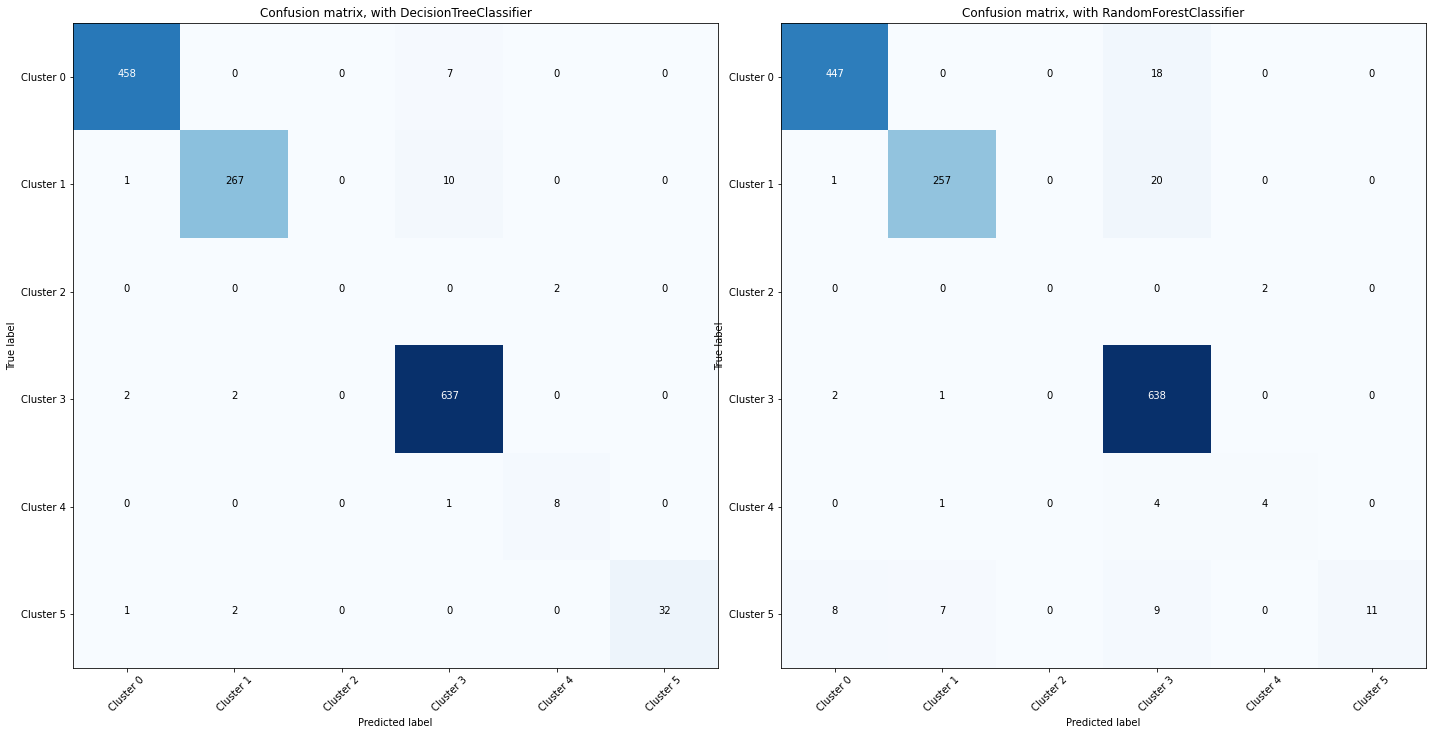

In [72]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = ["Cluster {}".format(x) for x in range(6)]
np.set_printoptions(precision=2)

plt.figure(figsize=(20,12))
plt.subplot(1, 2, 1)
cnf_matrix = confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cnf_matrix, classes=classes, title='Confusion matrix, with DecisionTreeClassifier')

plt.subplot(1, 2, 2)
cnf_matrix = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='Confusion matrix, with RandomForestClassifier')

plt.show()


## Conclusion
we trained the model with fixed values and a splitted dataset 2/3 for train and 1/3 to test. We can see that there is clearly more mistakes with ensemble learning and not with Random Forest. Moreover, in addition of having more accuracy, it also classify properly the cluster 4 with our VIP customer which is a good point. The main error is between cluster 0 and 1 vs Cluster 5. The main difference is that is some cases we lost the customer. This can be analysed in a good point too. As we classify some customer lost as customer not ofter active, that may mean that they are borderline and we may be able to convert them to permanent customer with some actions.
We succeed to find some specific patterns and create a model able to classify them from some of their order. We can also use this work to drive some actions like items to stop purchaing, trending items, detect customer being lost, rewoard our VIP customer and so on.